In [1]:
from gcVoronoi import *

In [2]:
# 1. get worldpop data for Senegal
df, crs = get_worldpop_population_data(iso3='SEN', return_crs=True)

Mapping pixels to coordinates...


Rows processed: 100%|██████████| 526/526 [00:00<00:00, 830.71it/s] 


In [3]:
# 2. get the administrative border for Senegal
border, bbox = get_admin_border_geom_lvl0(iso3='SEN', return_bbox=True)

In [4]:
# 3. perform the custom voronoi tessellation on healthsites data and constrain it to the predefined administrative border
vs, hosps = draw_constrained_voronoi(shapefile_filepath="Senegal healthsites/Senegal-node.shp", boundary_poly=border.geometry[0], return_hosps=True)

In [5]:
# 4. interface the voronoi tessellation with worldpop to get the population within each region
out = interface_w_worldpop(vs, df, hosps['osm_id'])

Interfacing with Worldpop...


Points processed: 100%|██████████| 237052/237052 [06:12<00:00, 636.67it/s] 


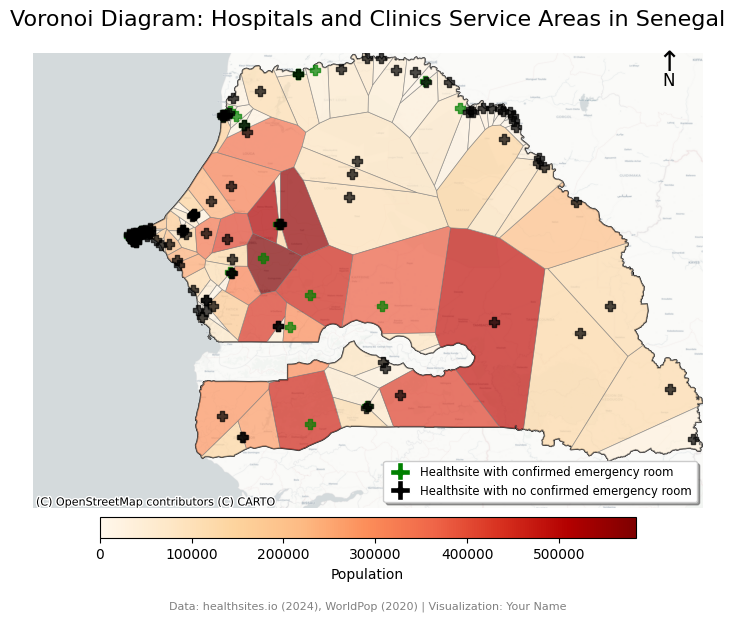

In [6]:
# 5a. render (static)
fig, ax = render_static(out, hosps, border, bbox)

In [7]:
# 5b. render (interactive)
m = render_interactive(out, hosps, border, bbox)
m